In [ ]:
## Importar librerias 

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [163]:
## Cargamos los datos  

df = pd.read_excel('Datos_201901_202009.xlsx')
print(df.head())

   CAMPAÑA  GRUPO_1  GRUPO_2  GRUPO_3  GRUPO_4  GRUPO_5  GRUPO_6  GRUPO_7  \
0   201901     6492     6062     2961     1652     1190       89       31   
1   201902     4757     3618     2089      855      399       54       13   
2   201903     5047     3031     1018      309      157       63       12   
3   201904     6227     4586     2056      569      197       94       23   
4   201905     5738     4504     2710      525      114       54       21   

   GRUPO_8  GRUPO_9  GRUPO_10  PEDIDOS_TOTALES  
0      410       15        43            54113  
1       19        9        20            43091  
2        7        8        10            50112  
3       10        7        11            49522  
4        8       10         7            51854  


In [162]:
print(df.describe()) ## (!) campaña tomada como entero

df = df.astype({'CAMPAÑA': str})

           GRUPO_1      GRUPO_2      GRUPO_3      GRUPO_4      GRUPO_5  \
count    27.000000    27.000000    27.000000    27.000000    27.000000   
mean   6423.407407  5044.185185  2922.037037   939.037037   416.074074   
std    1075.220666   998.678051  1069.612528   577.807360   412.075136   
min    4328.000000  3031.000000  1018.000000   100.000000    37.000000   
25%    5836.500000  4436.000000  2072.500000   533.500000   152.500000   
50%    6502.000000  5200.000000  3112.000000   759.000000   219.000000   
75%    7185.000000  5695.000000  3750.500000  1359.000000   517.500000   
max    8783.000000  6990.000000  4894.000000  2013.000000  1529.000000   

           GRUPO_6     GRUPO_7     GRUPO_8     GRUPO_9    GRUPO_10  \
count    27.000000   27.000000   27.000000   27.000000   27.000000   
mean    232.666667   33.814815   47.370370   35.444444   22.074074   
std     255.798148   31.527811   84.199008   87.200623   21.845482   
min      36.000000    3.000000    1.000000    2.00000

In [ ]:
print(df.info())

In [159]:
print(df.isna().sum())

CAMPAÑA            0
GRUPO_1            0
GRUPO_2            0
GRUPO_3            0
GRUPO_4            0
GRUPO_5            0
GRUPO_6            0
GRUPO_7            0
GRUPO_8            0
GRUPO_9            0
GRUPO_10           0
PEDIDOS_TOTALES    0
dtype: int64


### Preparacion de los datos 

In [164]:
## La suma de los pedidos por grupo representan 30% de las ventas totales

suma_grupos = 0
for i in range(1,10):
    suma_grupos = suma_grupos + sum(df[f'GRUPO_{i}'])
    print(suma_grupos)


suma_pedidos = df["PEDIDOS_TOTALES"].sum()
print("SUMA GRUPOS ", suma_grupos)
print("SUMA PEDIDOS TOTALES ", suma_pedidos)

173432
309625
388520
413874
425108
431390
432303
433582
434539
434539


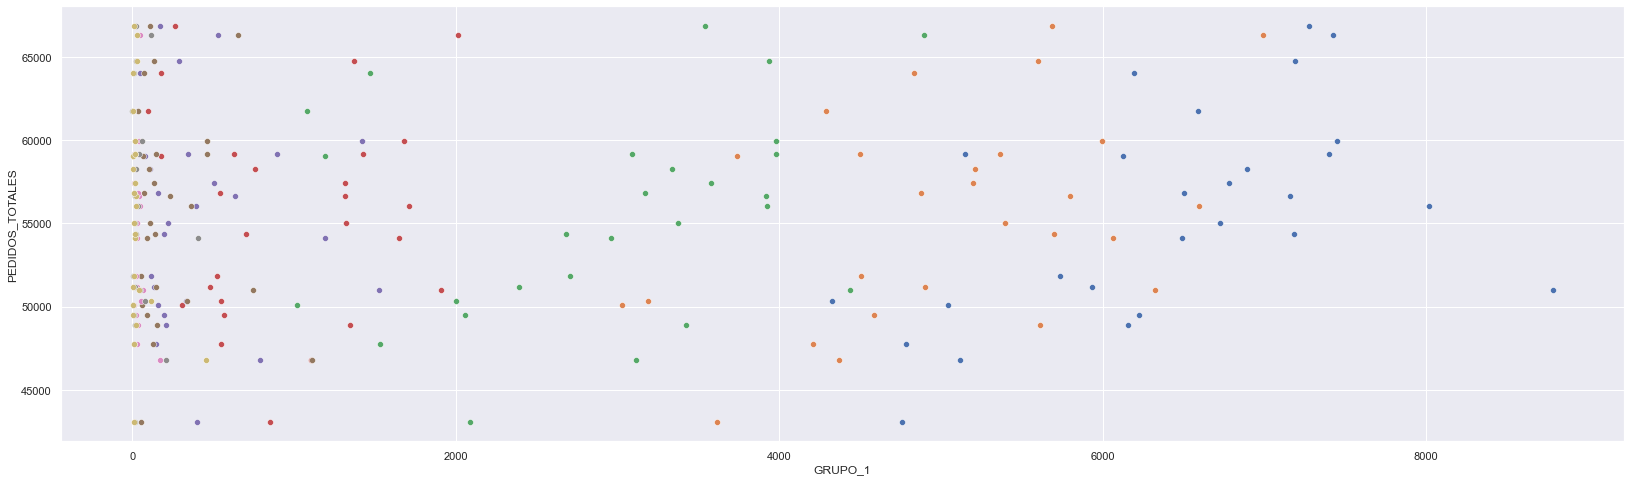

In [158]:
for i in range(1,10):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

In [ ]:
sns.set(rc={"figure.figsize":(28, 8)}) 

In [ ]:
sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) #ok

In [ ]:
sns.scatterplot(data=df, x='GRUPO_2', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

In [ ]:
sns.heatmap(df.corr(), annot=True)

### Modelo de Regresion 

In [ ]:
## Se aplica un Modelo de Regresion Lineal para hallar los coeficientes de la ecuacion

X = df.iloc[:,1:11]
y =df['PEDIDOS_TOTALES']
X_train, X_test, y_train,y_test = train_test_split(X,y)

lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
coef = lin.coef_

In [ ]:
## Ecuacion de la recta ## y = mx1x1 + ... m10x10 + b 

ecuacion = pd.DataFrame((zip)(X.columns,coef), columns =['grupo','coeficiente m'])
ecuacion = ecuacion.append({'grupo':'intercepto b','coeficiente m':lin.intercept_},ignore_index=True)
print(ecuacion)
